# Eq. da advecção-difusão

- Alterar os elementos da matriz -<b>done</b>
 
- Efeitos da cond. contorno na matriz -<b>done</b>

- Alterar a f  -<b>done</b>

$\frac{\partial (\rho u \phi)}{\partial x} + \frac{\partial (\rho v \phi)}{\partial y} = \frac{\partial}{\partial x}(k \frac{\partial \phi}{\partial x}) + \frac{\partial}{\partial y}(k \frac{\partial \phi}{\partial y}) + f(x,y)$

$\rho u = \rho v = k = 1$

$f = -\frac{\partial^2 \phi}{\partial x^2} -\frac{\partial^2 \phi}{\partial y^2} + \frac{\partial \phi}{\partial x} + \frac{\partial \phi}{\partial y}$

Para uma dimensão, temos:

$f = -\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial \phi}{\partial x}$

Discretizando:

$f = -\frac{(\phi_{i+1} - 2\phi_{i} + \phi_{i-1})}{\Delta x^2} + \frac{(\phi_{i+1} -\phi_{i-1})}{2\Delta x}$

Desta forma temos que os coeficientes da matriz A1 são dados por:

$-\Delta x^2 f = \phi_{i+1}(1+\Delta x/2) - 2\phi_{i} + \phi_{i-1}(1-\Delta x/2) + O(\Delta x^2)$

[[-3.      0.9375  0.      0.      0.      0.      0.      0.    ]
 [ 1.0625 -2.      0.9375  0.      0.      0.      0.      0.    ]
 [ 0.      1.0625 -2.      0.9375  0.      0.      0.      0.    ]
 [ 0.      0.      1.0625 -2.      0.9375  0.      0.      0.    ]
 [ 0.      0.      0.      1.0625 -2.      0.9375  0.      0.    ]
 [ 0.      0.      0.      0.      1.0625 -2.      0.9375  0.    ]
 [ 0.      0.      0.      0.      0.      1.0625 -2.      0.9375]
 [ 0.      0.      0.      0.      0.      0.      1.0625 -3.    ]]
0.053914064318804744


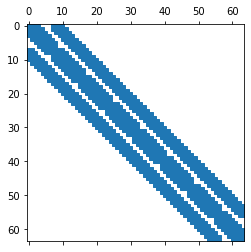

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve

def phi(x,y):
    return np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

def f(x,y):
    return 8*(np.pi**2)*np.sin(2*np.pi*x)*np.sin(2*np.pi*y) + 2*np.pi*(np.cos(2*np.pi*x)*np.sin(2*np.pi*y)) + 2*np.pi*(np.sin(2*np.pi*x)*np.cos(2*np.pi*y))
    
def main():
    N = 8
    a = 0
    b = 1
    dx = (b-a)/N
    
    k = [np.ones(N-1)*(1+dx/2),-2*np.ones(N),np.ones(N-1)*(1-dx/2)]
    offset = [-1,0,1]
    A1 = diags(k,offset).toarray()
    
    A1[0][0] = A1[0][0] -1
    A1[N-1][N-1] = A1[N-1][N-1] -1
    
    I = np.eye(N)
    
    A = csr_matrix(np.kron(A1,I) + np.kron(I,A1))
    
    plt.figure(1)
    plt.spy(A)
    
    phiex = np.zeros(N**2)
    rhs = np.zeros(N**2)

    x = np.zeros(N)
    y= np.zeros(N)
    for i in range(N):
        x[i] = a + (i+0.5)*dx
        y[i] = a + (i+0.5)*dx
    
    for j in range(N):
        for i in range(N):
            phiex[i+j*N] = phi(x[i],y[j])
            rhs[i+j*N] = -1*(dx**2)*f(x[i],y[j])
    
    for i in range(N):
        rhs[i] = rhs[i] + 2*phi(x[i],a)
        rhs[N**2 - 1 - i] = rhs[N**2 - 1 - i] + 2*phi(x[N-1-i], b)
    for j in range(N):
        rhs[j*N] = rhs[j*N] + 2*phi(a,y[j])
        rhs[(N-1)+j*N] = rhs[(N-1)+j*N] + 2*phi(b,y[j])
    
    phiaprox = spsolve(A,rhs)
    #print(x)
    err = np.zeros(N**2)
    for i in range(N**2):
        err[i] = np.abs(phiex[i] - phiaprox[i])
    #print("N =", N, "| err ->", np.linalg.norm(err, ord = np.inf))
    print(A1)
    print(err.max())
    
main()